# Lesson 11 Notes

## Purpose of the Exercise: Derivation of the vortex-source panel method.

In [17]:
import numpy
import math
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline
%run ./definitions.ipynb

import os
import numpy
from scipy import integrate, linalg

### Lifting-body panel method

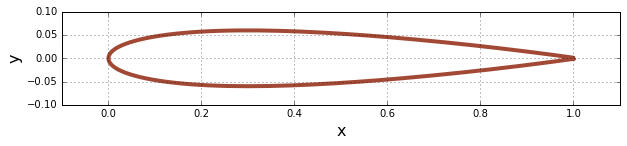

In [13]:
# load geometry
naca_filepath = os.path.join('resources','naca0012.dat')
with open(naca_filepath, 'r') as infile:
    x, y = numpy.loadtxt(infile, dtype=float, unpack=True)
    
# and plot geometry, just to check in
width = 10
pyplot.figure(figsize=(width,width))
pyplot.grid()
pyplot.xlabel('x',fontsize=16)
pyplot.ylabel('y',fontsize=16)
pyplot.plot(x,y,color='#A24936', linestyle='-', linewidth=4)
pyplot.axis('scaled', adjustable='box')
pyplot.xlim(-0.1, 1.1)
pyplot.ylim(-0.1, 0.1);

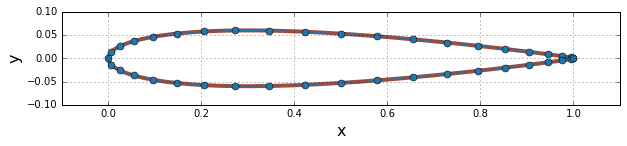

In [12]:
# discretize into panels
panels = define_panels(x,y,N=40)

# and plot this
width = 10
pyplot.figure(figsize=(width, width))
pyplot.grid()
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.plot(x, y, color='#A24936', linestyle='-', linewidth=4)
pyplot.plot(numpy.append([panel.xa for panel in panels], panels[0].xa),
            numpy.append([panel.ya for panel in panels], panels[0].ya),
            linestyle='-', linewidth=1, marker='o', markersize=7, color='#2176AE')
pyplot.axis('scaled', adjustable='box')
pyplot.xlim(-0.1, 1.1)
pyplot.ylim(-0.1, 0.1);


In [11]:
# define freestream condition
freestream = Freestream(u_inf=1.0, alpha=4.0)

In [16]:
A_source = source_contribution_normal(panels)
B_vortex = vortex_contribution_normal(panels)

In [19]:
A = build_singularity_matrix(A_source, B_vortex)
b = build_freestream_rhs(panels, freestream)

In [20]:
# solve for strengths
strengths = numpy.linalg.solve(A, b)

# store strength per panel
for i, panel in enumerate(panels):
    panel.sigma = strengths[i]
    
# store circulaton density
gamma = strengths[-1]